In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
import pandas as pd
%matplotlib inline


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
    


In [43]:
Dat = VaporTubes()
laserprofile = VaporTubes()
RawData = VaporTubes()
Dat.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-10-06_cut\\Diadem analysis_smooth", regExp= ".*\.tdms$")
laserprofile.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")
RawData.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-10-06_cut\\Diadem analysis_smooth", regExp= ".*\.tdms$")
print(Dat.pathnames)

RawData_770.tdms      C:\Users\aspit\OneDrive\Data\2018-10-06_cut\Di...
Together_tdms.tdms    C:\Users\aspit\OneDrive\Data\2018-10-06_cut\Di...
dtype: object


In [45]:
filepath = Dat.pathnames['Together_tdms.tdms']
filepath2 = Dat.pathnames['RawData_770.tdms']
Dat.import_data(filepath)
Dat.import_data(filepath2)
file1 = Dat.imports[filepath]
file2 = Dat.imports[filepath2]

filepath_laser = laserprofile.pathnames[0]
laserprofile.import_data(filepath_laser)
file_laser = laserprofile.imports[filepath_laser]

In [47]:
file2.groups()

['Spectra_770_seed_expt4_500Hz 2017 October 06 14_06_54',
 'Results_770_seed_expt4_500Hz 2017 October 06 14_06_54',
 'Frames']

In [59]:
#Pull in relevant groups
Potassium = Dat.get_data_pdframe(file1,'Norm')
Laser = Dat.get_data_pdframe(file1,'500Hz')
RawData_Frames =  Dat.get_data_pdframe(file2,'Frames')
RawData_extra =  Dat.get_data_pdframe(file2,'Results_770_seed_expt4_500Hz 2017 October 06 14_06_54')

In [66]:
K_int_1 = Potassium['Peak1_max_seed_expt4_767_Potassium1'].as_matrix()
K_int_2 = Potassium['Peak2_max_seed_expt4_770_Potassium1'].as_matrix()
K_time = Potassium['GateTime'].as_matrix()
L_int = Laser['Normalized'].as_matrix()
L_time = Laser['Time_offset'].as_matrix()

spectra = RawData_Frames['I_Frame_1'].as_matrix()
spectra_wl = RawData_extra['Wavelength'].as_matrix()
spectra_time = RawData_extra['GateTime'].as_matrix()

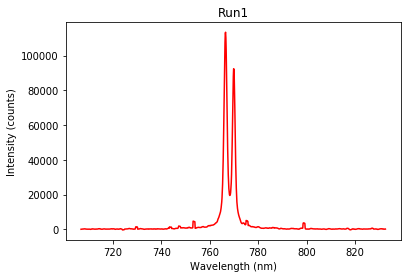

In [52]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run1")
plt.plot(spectra_wl,spectra, 'r')

C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\aspit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


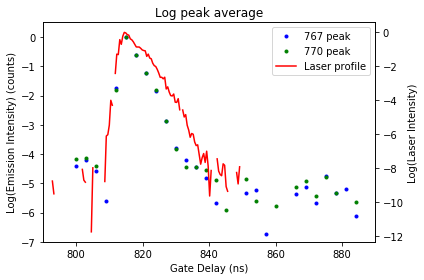

In [40]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(K_time, np.log(K_int_1), 'b.', label = '767 peak')
ln2 = ax1.plot(K_time, np.log(K_int_2), 'g.', label = '770 peak')

ax2 = ax1.twinx()

ax2.set_ylabel("Log(Laser Intensity)")
ax2.tick_params('y')

plt.legend()

ln3 = ax2.plot(L_time, np.log(L_int), 'r', label = 'Laser profile')

ax1.set_xlabel("Gate Delay (ns)")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel("Log(Emission Intensity) (counts)")
ax1.tick_params('y')




plt.title("Log peak average")
fig.tight_layout()

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_ylim(-7,0.5)
ax1.set_xlim(790,890)

plt.show()



In [ ]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(time, avg_peak1, 'b.', label = '780 peak')
ln2 = ax1.plot(time, avg_peak2, 'g.', label = '795 peak')
ax1.set_xlabel("Gate Delay (ns)")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel("Intensity (counts)")
ax1.tick_params('y')

plt.legend()
ax2 = ax1.twinx()

ln3 = ax2.plot(laser_time, laser_data, 'r', label = 'Laser profile')
ax2.set_ylabel("Laser profile")
ax2.tick_params('y')

plt.title("peak average")
fig.tight_layout()

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()


In [ ]:
print(data_peak1.shape[0])

NameError: name 'wl' is not defined

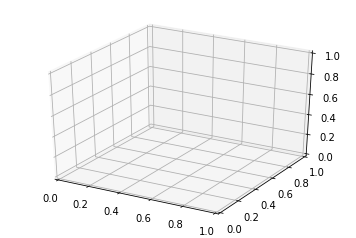

In [57]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = wl
verts = []
zs = time
i=0
numexposures = len(time)- 1
for z in zs:
    ys = df1.iloc[:,numexposures-i].as_matrix()
    i=i+1
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
    
    
poly = PolyCollection(verts, facecolors = (1,1,1,0), edgecolors=(0,0,1,0.5))
#poly.set_alpha(0.2)
#face_color = [0, 0, 0] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
#poly.set_edgecolor(face_color)
ax.add_collection3d(poly, zs=zs, zdir='y')


ax.set_xlabel('X')
ax.set_xlim3d(xs[0], xs[-1])
ax.set_ylabel('Y')
ax.set_ylim3d(time[0], time[-1])
ax.set_zlabel('Z')
ax.set_zlim3d(0, data_peak1.max().max())

ax.view_init(20, 300)

plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


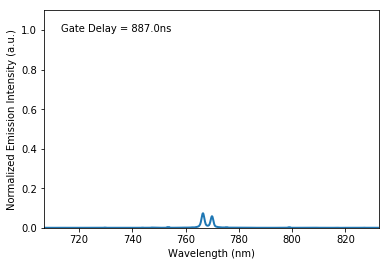

In [69]:

"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt


from matplotlib import animation, rc
from IPython.display import HTML

xs = spectra_wl

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(xs[0], xs[-1]), ylim=(0, 1.1))

line, = ax.plot([], [], lw=2)

time_template = 'Gate Delay = %.1fns'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    ax.set_ylabel("Normalized Emission Intensity (a.u.)")
    ax.set_xlabel("Wavelength (nm)") 
    return line,

# animation function.  This is called sequentially
def animate(i):
    print(i)
    y = RawData_Frames.iloc[:,i].as_matrix()
    y = y/RawData_Frames.max().max()
    line.set_data(xs, y)
    time_text.set_text(time_template % spectra_time[i])
    return line, time_text



# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=100, blit=True)


#TML(anim.to_html5_video())

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim
